# Исследование объявлений о продаже квартир

В вашем распоряжении данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктов за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. Ваша задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма.  
  
**Цель исследования:**  
1. Определить рыночную стоимость объектов недвижимости  
2. Определить факторы для отслеживания аномалий и мошеннической деятельности
3. Установить, какие факторы влияют на ценообразование стоимости квартир  


Данные получу из файла '/datasets/real_estate_data.csv'. О качестве данных ничего не известно, поэтому перед исследованием потребуется обзор и предобработка. 

<h1>Ход исследования<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Ознакомление-с-данными" data-toc-modified-id="Ознакомление-с-данными-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Ознакомление с данными</a></span></li><li><span><a href="#Предобработка-данных" data-toc-modified-id="Предобработка-данных-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Предобработка данных</a></span></li><li><span><a href="#Ввод-новых-столбцов" data-toc-modified-id="Ввод-новых-столбцов-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Ввод новых столбцов</a></span></li><li><span><a href="#Исследовательский-анализ-данных" data-toc-modified-id="Исследовательский-анализ-данных-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Исследовательский анализ данных</a></span><ul class="toc-item"><li><span><a href="#Стоимость:" data-toc-modified-id="Стоимость:-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Стоимость:</a></span></li><li><span><a href="#Общая-площадь:" data-toc-modified-id="Общая-площадь:-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>Общая площадь:</a></span></li><li><span><a href="#Жилая-площадь:" data-toc-modified-id="Жилая-площадь:-4.3"><span class="toc-item-num">4.3&nbsp;&nbsp;</span>Жилая площадь:</a></span></li><li><span><a href="#Площадь-кухни:" data-toc-modified-id="Площадь-кухни:-4.4"><span class="toc-item-num">4.4&nbsp;&nbsp;</span>Площадь кухни:</a></span></li><li><span><a href="#Количество-комнат:" data-toc-modified-id="Количество-комнат:-4.5"><span class="toc-item-num">4.5&nbsp;&nbsp;</span>Количество комнат:</a></span></li><li><span><a href="#Высота-потолков:" data-toc-modified-id="Высота-потолков:-4.6"><span class="toc-item-num">4.6&nbsp;&nbsp;</span>Высота потолков:</a></span></li><li><span><a href="#Этаж-квартиры:" data-toc-modified-id="Этаж-квартиры:-4.7"><span class="toc-item-num">4.7&nbsp;&nbsp;</span>Этаж квартиры:</a></span></li><li><span><a href="#Тип-этажности:" data-toc-modified-id="Тип-этажности:-4.8"><span class="toc-item-num">4.8&nbsp;&nbsp;</span>Тип этажности:</a></span></li><li><span><a href="#Общее-количество-этажей-в-доме:" data-toc-modified-id="Общее-количество-этажей-в-доме:-4.9"><span class="toc-item-num">4.9&nbsp;&nbsp;</span>Общее количество этажей в доме:</a></span></li><li><span><a href="#Расстояние-до-центра-города(м):" data-toc-modified-id="Расстояние-до-центра-города(м):-4.10"><span class="toc-item-num">4.10&nbsp;&nbsp;</span>Расстояние до центра города(м):</a></span></li><li><span><a href="#Расстояние-до-ближайшего-аэропорта(м):" data-toc-modified-id="Расстояние-до-ближайшего-аэропорта(м):-4.11"><span class="toc-item-num">4.11&nbsp;&nbsp;</span>Расстояние до ближайшего аэропорта(м):</a></span></li><li><span><a href="#Расстояние-до-ближайшего-парка(м):" data-toc-modified-id="Расстояние-до-ближайшего-парка(м):-4.12"><span class="toc-item-num">4.12&nbsp;&nbsp;</span>Расстояние до ближайшего парка(м):</a></span></li><li><span><a href="#Распределение-по-дням-недели:" data-toc-modified-id="Распределение-по-дням-недели:-4.13"><span class="toc-item-num">4.13&nbsp;&nbsp;</span>Распределение по дням недели:</a></span></li><li><span><a href="#Распределение-по-месяцам:" data-toc-modified-id="Распределение-по-месяцам:-4.14"><span class="toc-item-num">4.14&nbsp;&nbsp;</span>Распределение по месяцам:</a></span></li></ul></li><li><span><a href="#Как-быстро-продавались-квартиры:" data-toc-modified-id="Как-быстро-продавались-квартиры:-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Как быстро продавались квартиры:</a></span></li><li><span><a href="#Факторы,-больше-всего-влияющие-на-полную-стоимость-объекта" data-toc-modified-id="Факторы,-больше-всего-влияющие-на-полную-стоимость-объекта-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Факторы, больше всего влияющие на полную стоимость объекта</a></span></li><li><span><a href="#Средняя-стоимость-квадратного-метра-в-топ-10-городов-по-числу-объявлений" data-toc-modified-id="Средняя-стоимость-квадратного-метра-в-топ-10-городов-по-числу-объявлений-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Средняя стоимость квадратного метра в топ-10 городов по числу объявлений</a></span></li><li><span><a href="#Средняя-цена-за-каждый-км-в-Санкт-Петербурге" data-toc-modified-id="Средняя-цена-за-каждый-км-в-Санкт-Петербурге-8"><span class="toc-item-num">8&nbsp;&nbsp;</span>Средняя цена за каждый км в Санкт-Петербурге</a></span></li><li><span><a href="#Общий-вывод" data-toc-modified-id="Общий-вывод-9"><span class="toc-item-num">9&nbsp;&nbsp;</span>Общий вывод</a></span></li></ul></div>

### Ознакомление с данными

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
pd.set_option('display.max_columns', None) 
pd.options.display.float_format = '{:.2f}'.format 

data = pd.read_csv('https://code.s3.yandex.net/datasets/real_estate_data.csv', sep='\t')

data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.00,108.00,2019-03-07T00:00:00,3,2.70,16.00,51.00,8,NaN,False,False,25.00,NaN,Санкт-Петербург,18863.00,16028.00,1.00,482.00,2.00,755.00,NaN
1,7,3350000.00,40.40,2018-12-04T00:00:00,1,NaN,11.00,18.60,1,NaN,False,False,11.00,2.00,посёлок Шушары,12817.00,18603.00,0.00,NaN,0.00,NaN,81.00
2,10,5196000.00,56.00,2015-08-20T00:00:00,2,NaN,5.00,34.30,4,NaN,False,False,8.30,0.00,Санкт-Петербург,21741.00,13933.00,1.00,90.00,2.00,574.00,558.00
3,0,64900000.00,159.00,2015-07-24T00:00:00,3,NaN,14.00,NaN,9,NaN,False,False,NaN,0.00,Санкт-Петербург,28098.00,6800.00,2.00,84.00,3.00,234.00,424.00
4,2,10000000.00,100.00,2018-06-19T00:00:00,2,3.03,14.00,32.00,13,NaN,False,False,41.00,NaN,Санкт-Петербург,31856.00,8098.00,2.00,112.00,1.00,48.00,121.00


In [2]:
# визуализация 
pd.set_option('display.float_format', '{:.2f}'.format)
pd.set_option('display.max_colwidth', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

**Описание данных:**
* airports_nearest — расстояние до ближайшего аэропорта в метрах (м)
* balcony — число балконов
* ceiling_height — высота потолков (м)
* cityCenters_nearest — расстояние до центра города (м)
* days_exposition — сколько дней было размещено объявление (от публикации до снятия)
* first_day_exposition — дата публикации
* floor — этаж
* floors_total — всего этажей в доме
* is_apartment — апартаменты (булев тип)
* kitchen_area — площадь кухни в квадратных метрах (м²)
* last_price — цена на момент снятия с публикации
* living_area — жилая площадь в квадратных метрах (м²)
* locality_name — название населённого пункта
* open_plan — свободная планировка (булев тип)
* parks_around3000 — число парков в радиусе 3 км
* parks_nearest — расстояние до ближайшего парка (м)
* ponds_around3000 — число водоёмов в радиусе 3 км
* ponds_nearest — расстояние до ближайшего водоёма (м)
* rooms — число комнат
* studio — квартира-студия (булев тип)
* total_area — общая площадь квартиры в квадратных метрах (м²)
* total_images — число фотографий квартиры в объявлении

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

In [4]:
data.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

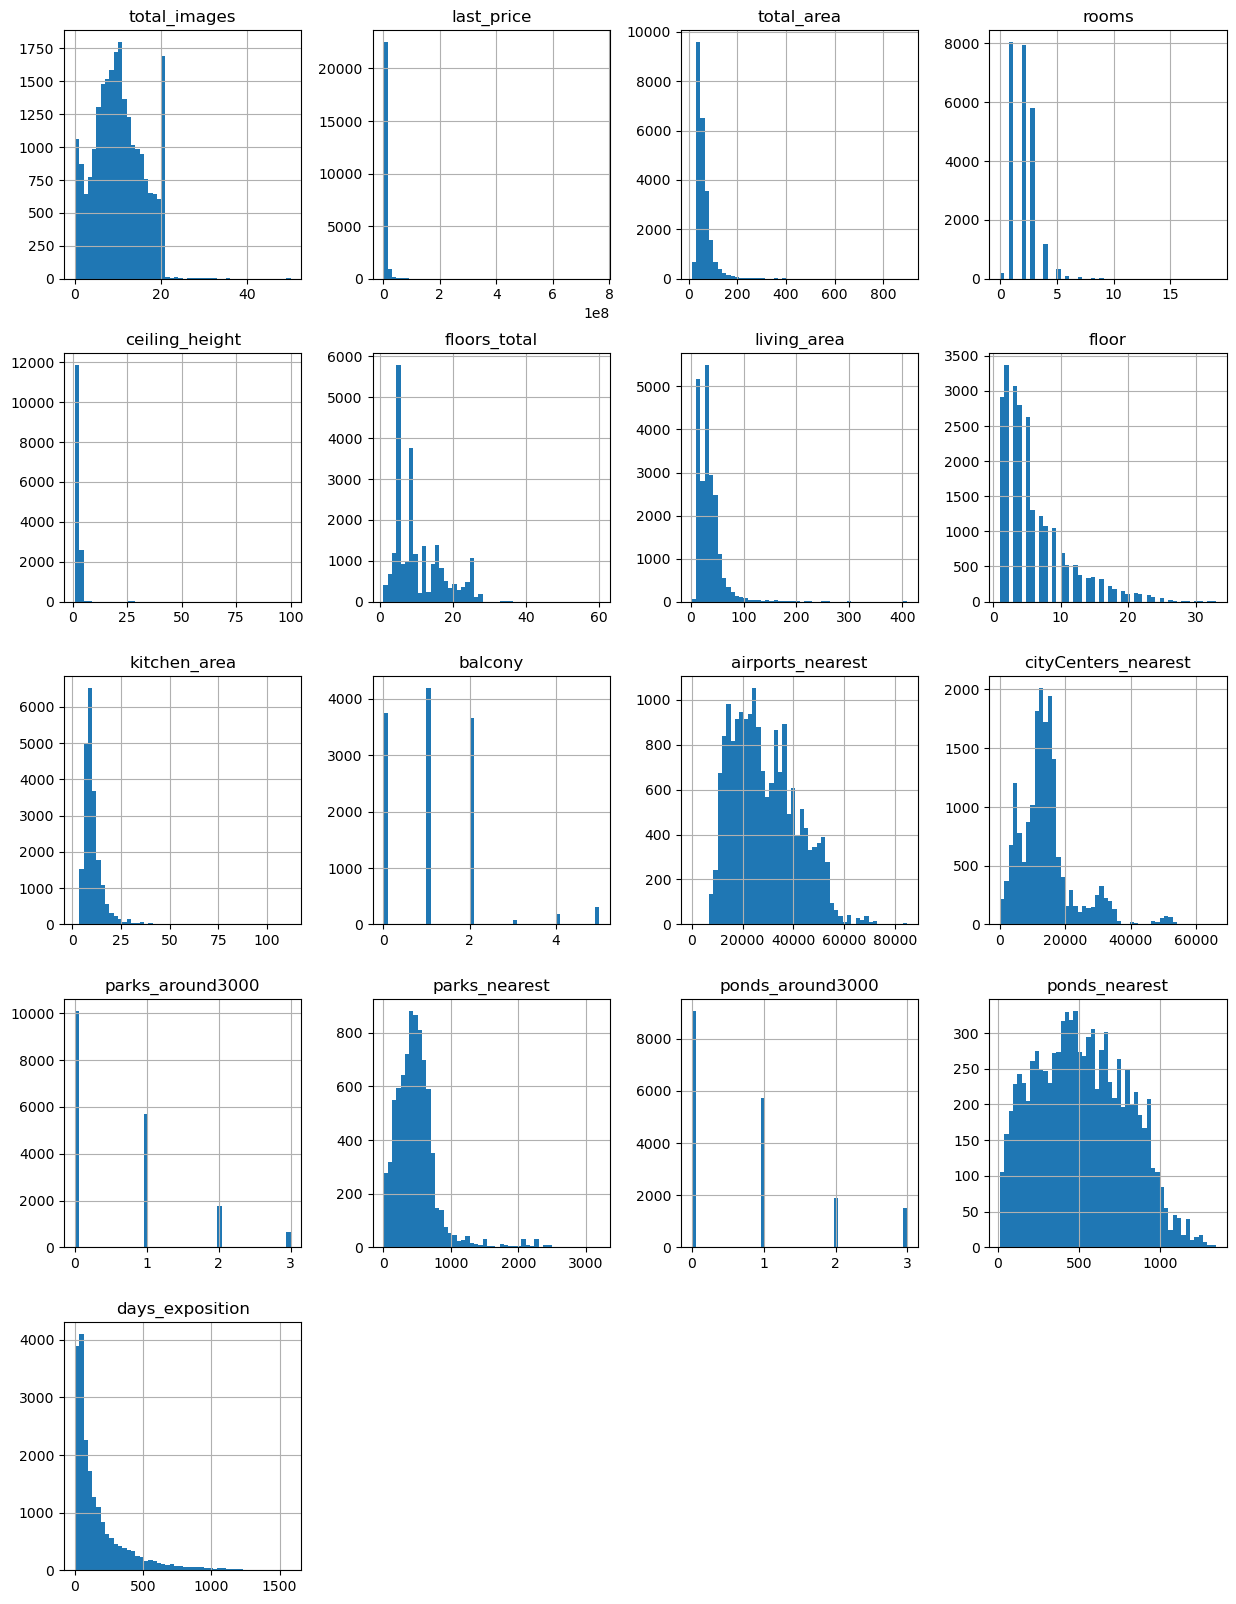

In [5]:
data.hist(bins=50, figsize=(15, 20))
plt.show()

**Вывод:** Исходные данные требуют предобработки: 
- last_price - тип данных
- first_day_exposition - изменить тип данных
- ceiling_height - пропуски
- floors_total - этажи - целые числа, изменить тип данных
- living_area - пропуски
- kitchen_area - пропуски
- locality_name - пропуски и неявные дубликаты   
- is_apartment - тип данных и пропуски
- balcony - изменить тип данных на целые числа, пропуски

### Предобработка данных

In [6]:
#last_price
#Для удобства перевожу цену в целочисленный формат и делю на 1000. Далее при анализе учитываю, что цена в тыс.руб:
data['last_price']=(data['last_price']/1000).astype(int)

In [7]:
#first_day_exposition
#Перевожу столбец с датой в формат даты без времени, т.к. время не указано
data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'], format = '%Y-%m-%d')

In [8]:
#ceiling_height
#Высота потолков в домах старого фонда порой достигает 4,2м. Оставим в данных адекватные значения высоты потолков для квартир 
# - от 2х до 5ти метров, на данные это не повлияет, т.к. аномальных значений менее сорока. Пропуски заменяю на медианное значение.
data['ceiling_height'].fillna(data['ceiling_height'].median(), inplace=True)
data = data.query('5 > ceiling_height > 2')

* Высота потолков: часть значений были введены вручную с ошибкой (25 м вместо 2,5 м и т.д.). Все пропущенные значения обработаны: была сделана замена на общую медиану.  

In [9]:
#floors_total
#Строки, где отсутствует этажность здания, удаляю. Тип данных меняю на int
data.dropna(subset=['floors_total'], inplace=True)
data['floors_total']=data['floors_total'].astype(int)

* Число этажей в доме: Данный признак будет использоваться в анализе, при этом достаточно точно заменить пропущенные значения не представляется возможным, поэтому все строки с пропущенными значениями удалены. Предлагается автоматизировать заполнение данных по этому признаку для городов на основе точного адреса.  

In [10]:
#living_area
#Вычисляю долю жилой площади от общей по всему датасету для адекватной замены пропусков:
living_share = data['living_area'].mean() / data['total_area'].mean()
data['living_area'].fillna(living_share * data['total_area'], inplace=True)

In [11]:
#kitchen_area
#Вычисляю долю площади кухни от общей по всему датасету для замены пропусков:
kitchen_share = data['kitchen_area'].median() / data['total_area'].median()
data['kitchen_area'].fillna(kitchen_share * data['total_area'], inplace=True)

* Жилая площадь и площадь кухни: Пропуски заполнены на основании гипотезы, что если нам известна общая площадь недвижимости, то мы можем оценить, сколько квадратных метров составляет жилая площадь и площадь кухни на основе уже заполненных пользователями данных.  

In [12]:
#locality_name
#Без населенного пункта данные для анализа непригодны, удаляю:
data.dropna(subset=['locality_name'], inplace=True)
#Удаляю неявные дубликаты в названиях населенных пунктов:
means = ['городской поселок', 'городской посёлок', 'поселок городского типа', 'посёлок городского типа', 'деревня', 'коттеджный посёлок', 'коттеджный поселок', 'поселок', 'посёлок']
for mean in means:
    data['locality_name'] = data['locality_name'].str.replace(mean, '')

* Название населенного пункта: Все строки с пропущенными значениями удалены, так как этот признак будет использоваться при дальнейшем анализе. Необходимо ввести условие об обязательном заполнении данного признака в объявлении (либо об автоматизированном заполнении на основе указанной улицы, если это возможно).  

In [13]:
#is_apartment
#Скорее всего, если не указан тип "апартаменты", значит это не так, заменим на False. Тип данных заменяю на bool:
data['is_apartment'].fillna('False', inplace=True)
data['is_apartment'] = data['is_apartment'].astype(bool)

In [14]:
#balcony
#Привожу в целочисленный тип количество балконов, заменяю пропущенные значения на 0:
data['balcony'] = data['balcony'].fillna(value=0).astype(int)

* Число балконов: Предполагается, что отсутствие числа балконов свидетельствует о том, что число балконов равно нулю. 

In [15]:
#days_exposition 
#Заменяю пропущенные значения на медиану. Тип данных меняю на int
data['days_exposition'].fillna(data['days_exposition'].median(), inplace=True)
data['days_exposition']=data['days_exposition'].astype(int)

* Длительность размещения объявления: Все пропущенные значения были заменены на медиану.
* Расстояние до центра города: Поскольку трудоемкость заполнения таких пропущенных значений велика по сравнению с их общим количеством, оставим данные пропущенные значения без изменений.
* Расстояние до ближайшего аэропорта, число парков в радиусе 3 км, расстояние до ближайшего парка, число водоемов в радиусе 3 км, расстояние до ближайшего водоема: пропущенные значения в этих признаках оставлены без изменений, так как они не будут использованы в текущем исследовании.  


__Вывод:__ 
При обработке данных выявлено: 
- Разработчикам следует добавить условие на ручной ввод: высота потолков не может быть двузначной величиной, а также меньше 2 м (в данных существуют значения в 1,75 м и даже в 1 м)
- Типы собираемых данных не всегда корректны: цена, количество этажей в доме, количество балконов, срок размещения должны вводиться как целые числа.
- Предлагаю по возможности автоматизировать заполнение этажности дома по адресу
- Предлагаю сделать обязательным заполнение населенного пункта, а также ограничить ввод выбором из выпадающего списка для предупреждения неявных дубликатов.

### Ввод новых столбцов 

In [16]:
#Добавляю столбец с ценой за квадратный метр:
data['sqm_price'] = (data['last_price']*1000 / data['total_area']).astype('int')

#Добавляю столбец дня недели:
data['weekday_exposition'] = data['first_day_exposition'].dt.weekday

#Добавляю столбец месяца:
data['month_exposition'] = data['first_day_exposition'].dt.month

#Добавляю столбец года:
data['year_exposition'] = data['first_day_exposition'].dt.year

#Добавляю тип этажа квартиры. Функция для определения типа этажности:
def floor_category(row):
    floors_total = row['floors_total']
    floor = row['floor']
    if floor == 1:
        return 'первый'
    elif floor == floors_total:
        return 'последний'
    elif 1 < floor < floors_total:
        return 'другой'
    
#Категоризую этажи с помощью функции
data['floor_category'] = data.apply(floor_category, axis = 1)

#Добавляю столбец соотношения жилой площади к общей
data['living_area_share'] = (data['living_area'] / data['total_area']).astype(float)

#Добавляю столбец отношения площади кухни к общей
data['kitchen_area_share'] = (data['kitchen_area'] / data['total_area']).astype(float)

#Добавляю столбец с удаленностью от центра в км
data['cityCenters_nearest_km'] = (data['cityCenters_nearest']/1000).round() 

data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,sqm_price,weekday_exposition,month_exposition,year_exposition,floor_category,living_area_share,kitchen_area_share,cityCenters_nearest_km
0,20,13000,108.00,2019-03-07,3,2.70,16,51.00,8,True,False,False,25.00,0,Санкт-Петербург,18863.00,16028.00,1.00,482.00,2.00,755.00,95,120370,3,3,2019,другой,0.47,0.23,16.00
1,7,3350,40.40,2018-12-04,1,2.65,11,18.60,1,True,False,False,11.00,2,Шушары,12817.00,18603.00,0.00,NaN,0.00,NaN,81,82920,1,12,2018,первый,0.46,0.27,19.00
2,10,5196,56.00,2015-08-20,2,2.65,5,34.30,4,True,False,False,8.30,0,Санкт-Петербург,21741.00,13933.00,1.00,90.00,2.00,574.00,558,92785,3,8,2015,другой,0.61,0.15,14.00
3,0,64900,159.00,2015-07-24,3,2.65,14,90.81,9,True,False,False,27.82,0,Санкт-Петербург,28098.00,6800.00,2.00,84.00,3.00,234.00,424,408176,4,7,2015,другой,0.57,0.17,7.00
4,2,10000,100.00,2018-06-19,2,3.03,14,32.00,13,True,False,False,41.00,0,Санкт-Петербург,31856.00,8098.00,2.00,112.00,1.00,48.00,121,100000,1,6,2018,другой,0.32,0.41,8.00


### Исследовательский анализ данных

#### Стоимость:

In [17]:
data['last_price'].describe()

count    23514.00
mean      6527.00
std      10839.30
min         12.00
25%       3401.25
50%       4650.00
75%       6790.00
max     763000.00
Name: last_price, dtype: float64

<AxesSubplot:ylabel='Frequency'>

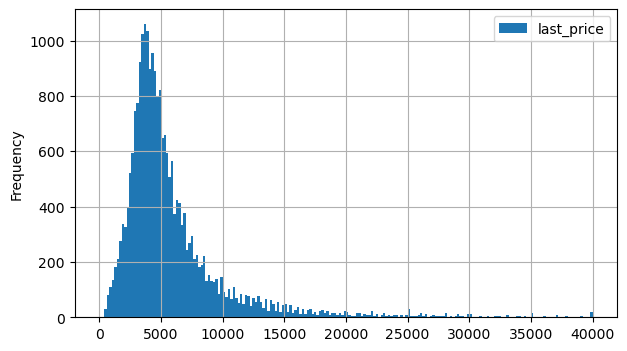

In [18]:
data.plot(y = 'last_price', kind = 'hist', bins = 200, grid=True, figsize = (7,4), range = (0, 40000))

<AxesSubplot:>

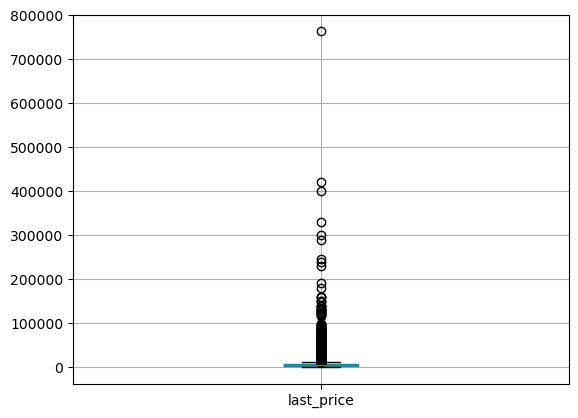

In [19]:
data.boxplot('last_price')

На данном этапе приняла решение исключить аномалии - объекты стоимостью более 200млн. Приимая во внимание, что элитная недвижимость может стоить в разы дороже и называться при этом квартирой, в данном случае для анализа такие объекты предсавляют собой выбросы.

In [20]:
data = data.query('last_price < 200000')

Основная часть квартир стоимостью до 10 миллионов. Средняя квартира, выставленная на продажу, стоит 4,65 млн рублей  .

#### Общая площадь:

In [21]:
data['total_area'].describe()

count   23505.00
mean       60.16
std        34.54
min        12.00
25%        40.00
50%        52.00
75%        69.70
max       631.20
Name: total_area, dtype: float64

<AxesSubplot:ylabel='Frequency'>

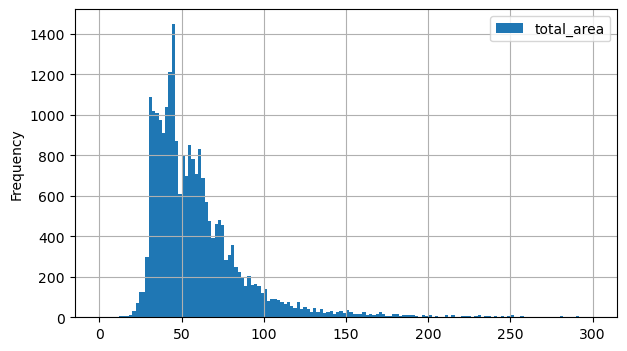

In [22]:
data.plot(y = 'total_area', kind = 'hist', bins = 150, grid=True, figsize = (7,4), range = (0,300))

Три пика объясняются наибольшим количеством 1, 2 и 3-х комнатных квартир - самых многочисленных и популярных. То же актуально и для жилой площади и площади кухни.

<AxesSubplot:>

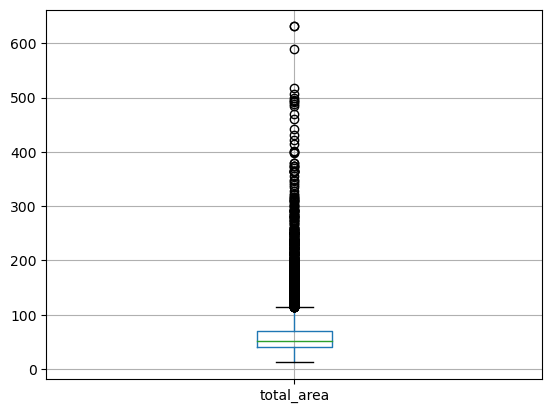

In [23]:
data.boxplot('total_area')

За аномалии в общей площади принимаю квартиры более 300кв.м

In [24]:
data = data.query('total_area < 300')

Основная часть квартир площадью до 120 квадратных метров, при этом самые популярные - 45, 42, 31, 60 кв.м. 
Средняя квартира, выставленная на продажу, имеет общую площадь 52 кв.м (30 жилая + 9 кухня).

#### Жилая площадь:

In [25]:
data['living_area'].describe()

count   23450.00
mean       34.06
std        19.69
min         2.00
25%        19.00
50%        30.00
75%        42.00
max       250.00
Name: living_area, dtype: float64

<AxesSubplot:ylabel='Frequency'>

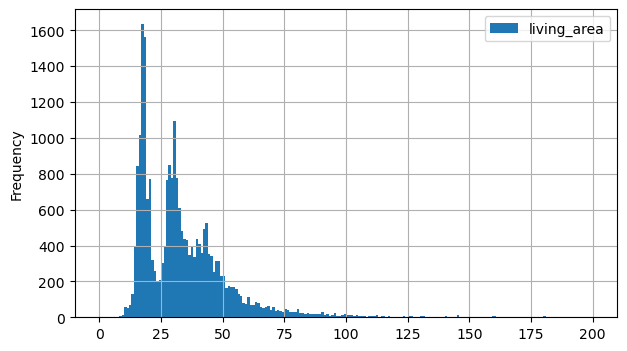

In [26]:
data.plot(y = 'living_area', kind = 'hist', bins = 200, grid=True, figsize = (7,4), range = (0,200))

Самые частые варианты жилой площади - от 10 до 50 метров. Средняя квартира, выставленная на продажу, имеет жилую площадь 34 кв.м.

#### Площадь кухни:

In [27]:
data['kitchen_area'].describe()

count   23450.00
mean       10.41
std         5.67
min         1.30
25%         7.00
50%         9.00
75%        12.00
max       107.00
Name: kitchen_area, dtype: float64

<AxesSubplot:ylabel='Frequency'>

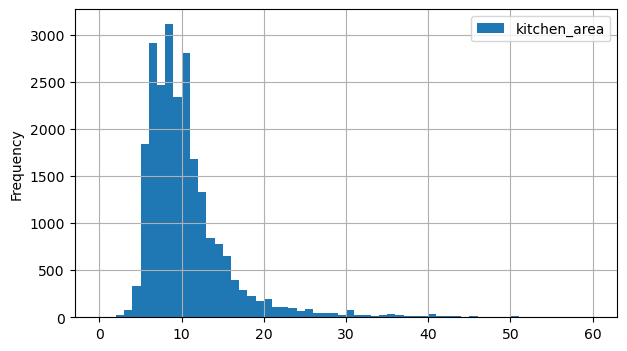

In [28]:
data.plot(y = 'kitchen_area', kind = 'hist', bins = 60, grid=True, figsize = (7,4), range = (0,60))

Самые распространённые кухни - от 5 до 15 метров, больше 20 метров кухни практически не встречаются. Средняя квартира, выставленная на продажу, имеет кухню 10кв.м.

#### Количество комнат:

In [29]:
data['rooms'].describe()

count   23450.00
mean        2.06
std         1.04
min         0.00
25%         1.00
50%         2.00
75%         3.00
max        16.00
Name: rooms, dtype: float64

<AxesSubplot:ylabel='Frequency'>

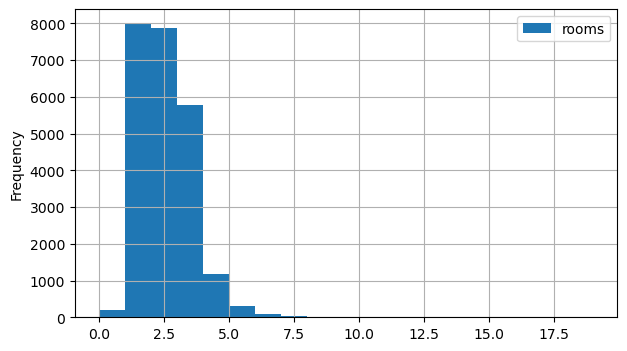

In [30]:
data.plot(y = 'rooms', kind = 'hist', bins = 19, grid=True, figsize = (7,4), range = (0,19))

Самые популярные квартиры - 1, 2 и 3х-комнатные. Средняя квартира, выставленная на продажу - двухкомнатная.

#### Высота потолков:

In [31]:
data['ceiling_height'].describe()

count   23450.00
mean        2.70
std         0.21
min         2.20
25%         2.60
50%         2.65
75%         2.70
max         4.90
Name: ceiling_height, dtype: float64

<AxesSubplot:ylabel='Frequency'>

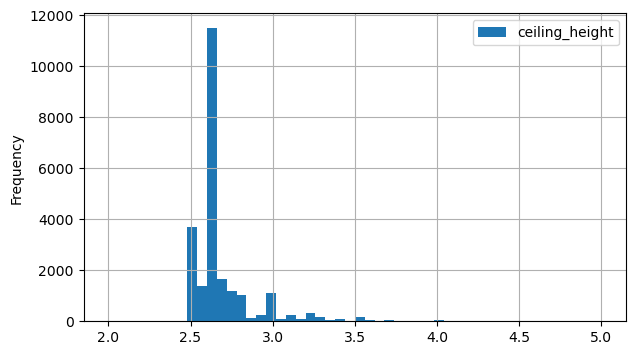

In [32]:
data.plot(y = 'ceiling_height', kind = 'hist', bins = 50, grid=True, figsize = (7,4), range = (2,5))

Большинство объектов имеют высоту потолков от 2,5 до 3 метров. Средняя квартира, выставленная на продажу, будет с потолками 2,65 м.

#### Этаж квартиры:

In [33]:
data['floor'].describe()

count   23450.00
mean        5.88
std         4.87
min         1.00
25%         2.00
50%         4.00
75%         8.00
max        33.00
Name: floor, dtype: float64

<AxesSubplot:ylabel='Frequency'>

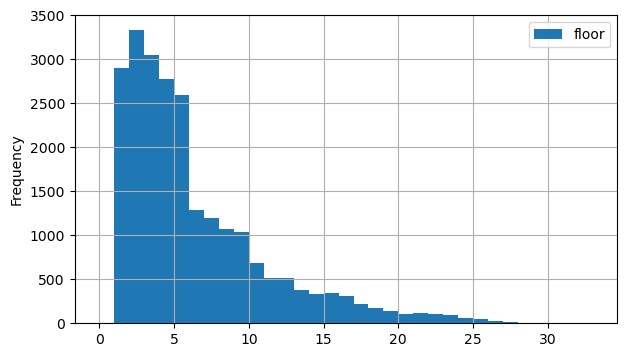

In [34]:
data.plot(y = 'floor', kind = 'hist', bins = 33, grid=True, figsize = (7,4), range = (0,33))

Большая часть объявленнний с квартирами на этажах до 5го включительно. Средняя квартира, выставленная на продажу, располагается 4м этаже.

#### Тип этажности:

<AxesSubplot:>

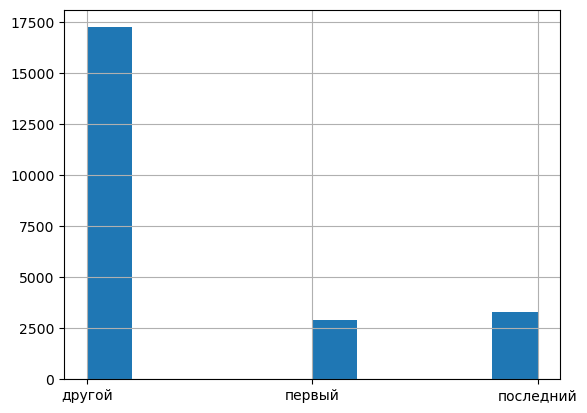

In [35]:
data['floor_category'].hist()

Большая часть продающихся квартир располагается не на первом и не на последнем этажах. 

#### Общее количество этажей в доме:

In [36]:
data['floors_total'].describe()

count   23450.00
mean       10.69
std         6.59
min         1.00
25%         5.00
50%         9.00
75%        16.00
max        60.00
Name: floors_total, dtype: float64

<AxesSubplot:ylabel='Frequency'>

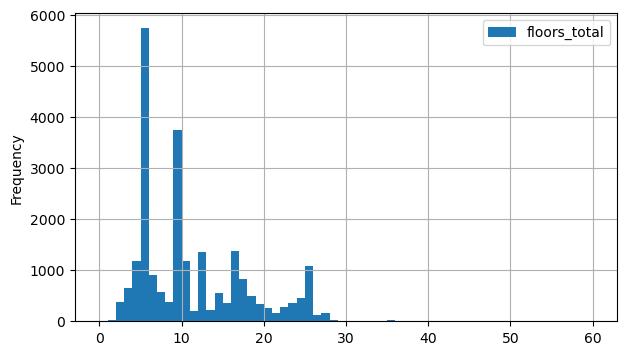

In [37]:
data.plot(y = 'floors_total', kind = 'hist', bins = 60, grid=True, figsize = (7,4), range = (0,60))

Самые популярные варианты этажности здания - 5ти, 9ти и 16ти этажные. Также популярны 4х-, 10ти- и 25-ти этажные дома.

#### Расстояние до центра города(м):

In [38]:
data['cityCenters_nearest'].describe()

count   17971.00
mean    14217.46
std      8608.19
min       181.00
25%      9289.00
50%     13114.00
75%     16293.00
max     65968.00
Name: cityCenters_nearest, dtype: float64

<AxesSubplot:ylabel='Frequency'>

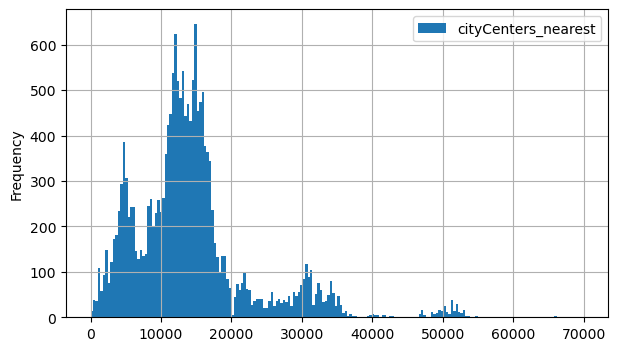

In [39]:
data.plot(y = 'cityCenters_nearest', kind = 'hist', bins = 200, grid=True, figsize = (7,4), range = (0,70000))

Самое большое количество квартир продавалось удаленностью от центра - от 10ти до 17км. 
Провал на графике в районе 5-10 км можно объяснить географически - Невская губа, а следовательно общее количество недвижимости в этом радиусе меньше. 

#### Расстояние до ближайшего аэропорта(м):

In [40]:
data['airports_nearest'].describe()

count   17950.00
mean    28805.12
std     12647.17
min         0.00
25%     18545.00
50%     26766.00
75%     37294.00
max     84869.00
Name: airports_nearest, dtype: float64

<AxesSubplot:ylabel='Frequency'>

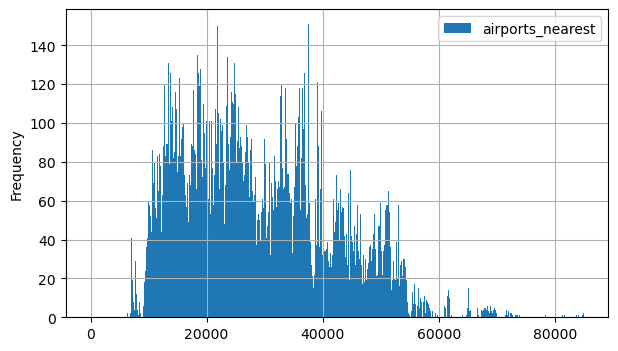

In [41]:
data.plot(y = 'airports_nearest', kind = 'hist', bins = 500, grid=True, figsize = (7,4), range = (0,85000))

Большинство продающихся квартир удалены от Аэропорта не далее 30км. 

#### Расстояние до ближайшего парка(м):

In [42]:
data['parks_nearest'].describe()

count   7972.00
mean     490.82
std      341.94
min        1.00
25%      288.00
50%      455.00
75%      612.00
max     3190.00
Name: parks_nearest, dtype: float64

<AxesSubplot:ylabel='Frequency'>

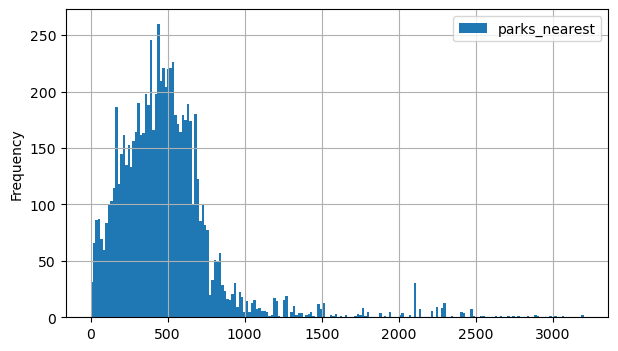

In [43]:
data.plot(y = 'parks_nearest', kind = 'hist', bins = 200, grid=True, figsize = (7,4), range = (0,3200))

В основном, продающиеся квартиры удалены от парка до 700м.

#### Распределение по дням недели:

<AxesSubplot:ylabel='Frequency'>

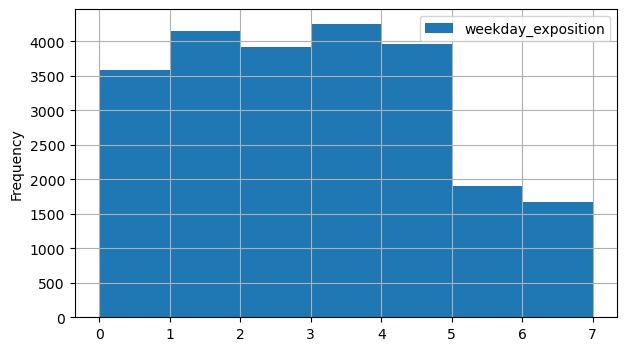

In [44]:
data.plot(y = 'weekday_exposition', kind = 'hist', bins = 7, grid=True, figsize = (7,4), range = (0,7))

В субботу и воскресенье вполовину меньше размещенных объявлений. Предположительно это объясняется пятидневкой в риелторских компаниях. 

#### Распределение по месяцам:

<AxesSubplot:ylabel='Frequency'>

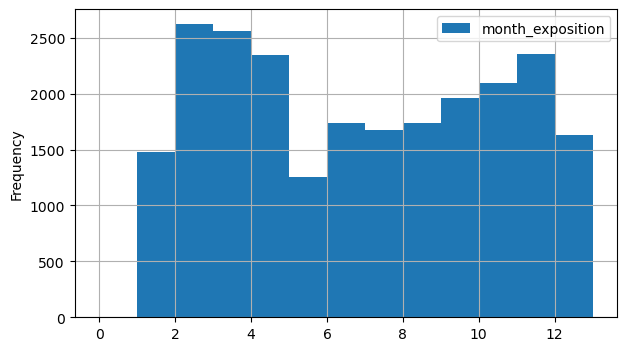

In [45]:
data.plot(y = 'month_exposition', kind = 'hist', bins = 13, grid=True, figsize = (7,4), range = (0,13))

В январе, мае и декабре наблюдался спад выставления квартир на продажу. 

**Вывод:**

Основная часть квартир площадью до 120 квадратных метров, при этом самые популярные - 45, 42, 31, 60 кв.м.; стоимостью до 10 миллионов, одно-, двух- или трехкомнатые. Большинство объектов имеют высоту потолков от 2,5 до 3 метров. Самые распространённые кухни - от 5 до 15 метров, больше 20 метров кухни практически не встречаются. Самые частые варианты жилой площади - от 10 до 50 метров. Большая часть объявленнний с квартирами на этажах до 5го включительно. Самые популярные варианты этажности здания - 5ти, 9ти и 16ти этажные. Большинство объявлеий о квартирах не на первом или последнем этажах. Самое большое количество квартир продавалось удаленностью от центра - от 10ти до 17км. В январе, мае и декабре наблюдался спад выставления квартир на продажу. В выходные дни квартиры выставлялись вдвое реже, чем в будние.

Средняя квартира, выставленная на продажу, имеет следующие характеристики:  
это 2-комнатная квартира  
общей площадью 52 кв.м (30 жилая + 9 кухня)
с потолками 2,65 м  
по цене 4,65 млн рублей  
на 4м этаже 9ти этажного дома  
за 13км от центра города  
с парком в доступости 500м

### Как быстро продавались квартиры:

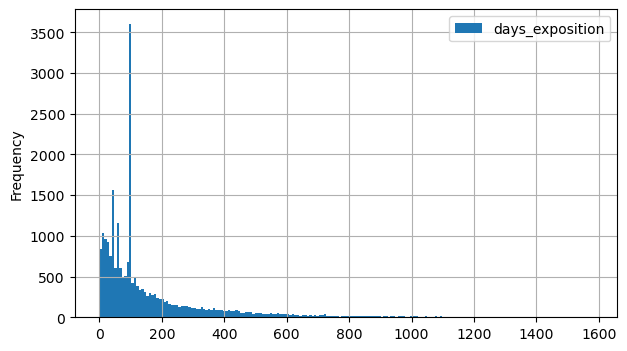

In [46]:
data.plot(y = 'days_exposition', kind = 'hist', bins = 200, grid=True, figsize = (7,4), range = (0, 1580))
plt.show()

In [47]:
print(data['days_exposition'].value_counts().head(7))
#45, 60, 7, 30, 90 дней - пики, вероятно связанные с условиями размещения на сервисе. Но надо учитывать, что часть из этих 
#объявлений действительно сняли по причине продажи в эти дни.

95    3209
45     878
60     538
7      233
30     207
90     199
4      174
Name: days_exposition, dtype: int64


In [48]:
data['days_exposition'].describe()

count   23450.00
mean      169.06
std       206.42
min         1.00
25%        45.00
50%        95.00
75%       198.00
max      1580.00
Name: days_exposition, dtype: float64

**Вывод:**

Как правило, продажа происходила в первые 3 месяца. При этом огромная часть объявлений за эти 3 мес. сняты спустя 45, 60 и 90 дней с момента публикации. Вероятно это объясняется условиями по срокам размещения на сервисе. Быстрые продажи - менее 45 дней, долгие - более полугода.

### Факторы, больше всего влияющие на полную стоимость объекта

In [49]:
def factor_influence(factor):
    data.pivot_table(index=factor, values='last_price', aggfunc='median').plot(grid=True, style='o')
    print('Корреляция:')
    return data['last_price'].corr(data[factor]) 

Корреляция:


0.7168905121322822

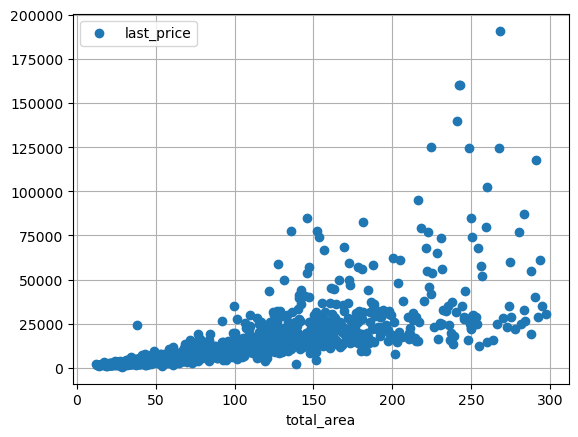

In [50]:
#Общая площадь
factor_influence('total_area')

Корреляция:


0.6346432709423012

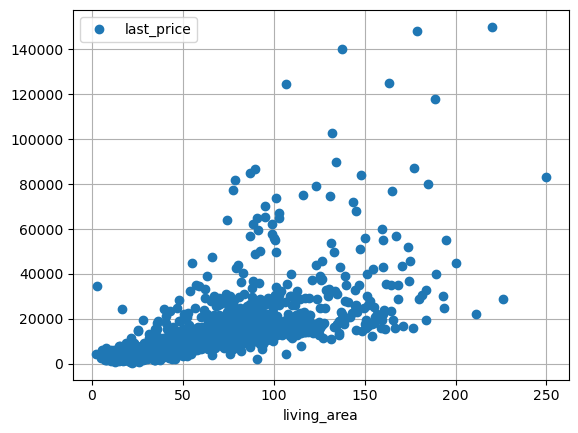

In [51]:
#Жилая площадь
factor_influence('living_area')

Корреляция:


0.5689179967848461

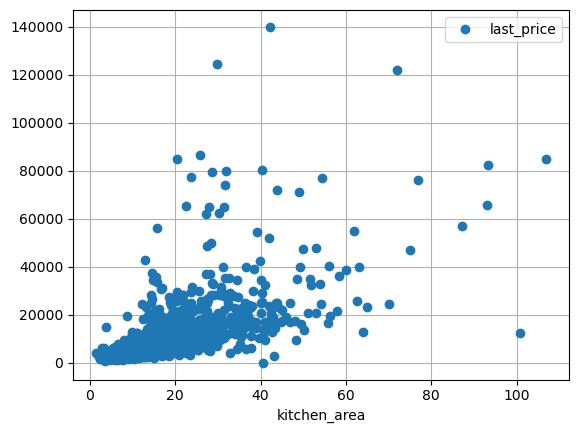

In [52]:
#Площадь кухни
factor_influence('kitchen_area')

Корреляция: 0.4257974650266842


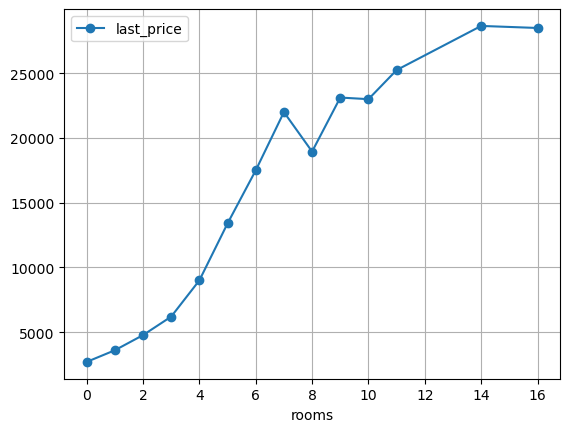

In [53]:
#Количество комнат
data.pivot_table(index='rooms', values='last_price', aggfunc='median').plot(grid=True, style='o-')
print('Корреляция:', data['last_price'].corr(data['rooms']))

<AxesSubplot:xlabel='floor_category'>

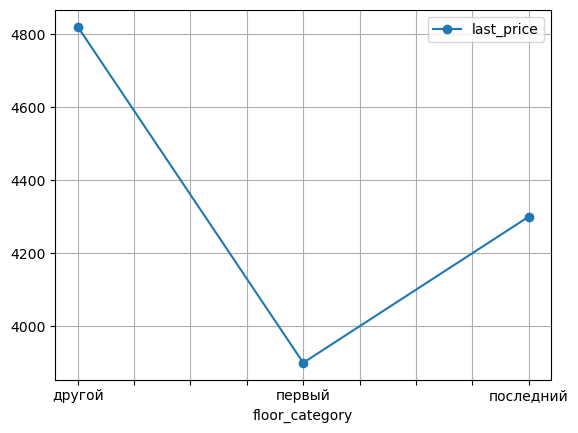

In [54]:
#Тип этажности
data.pivot_table(index='floor_category', values='last_price', aggfunc='median').plot(grid=True, style='o-')

Наиболее сильная корреляция наблюдается между общей площадью квартиры и ее стоимостью (коэфф. корреляции 0,71).
Стоимость квартиры также напрямую зависит от числа комнат: чем их больше, тем квартира дороже.  
Квартиры на первом или последнем этаже обычно продаются по более низкой цене, чем квартиры на других этажах.

<AxesSubplot:xlabel='year_exposition'>

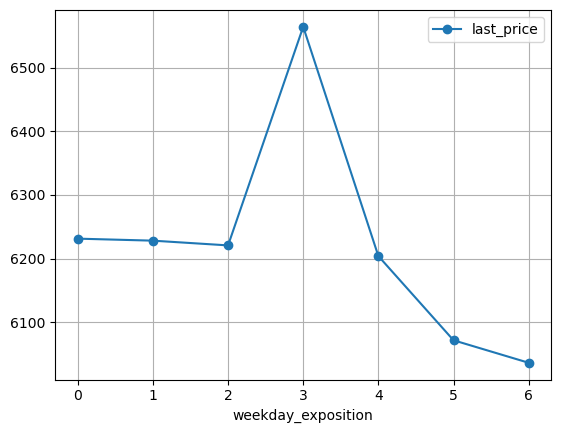

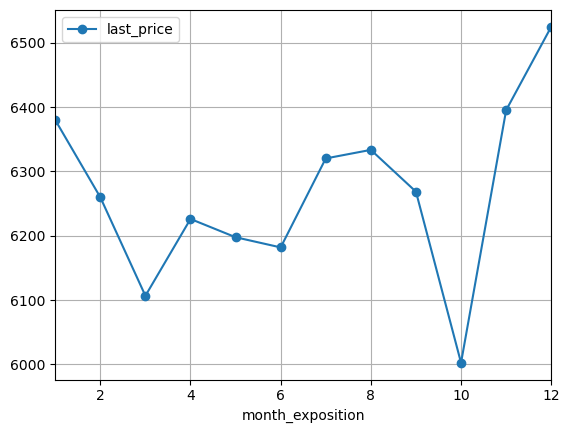

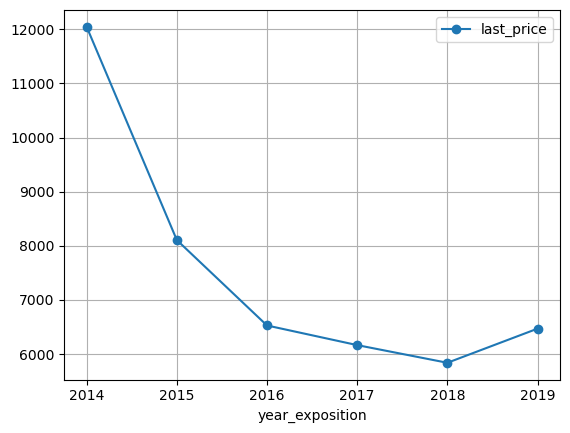

In [55]:
# Зависимость от дня размещения
data.pivot_table(index='weekday_exposition', values='last_price').plot(grid=True, style='o-')

# Зависимость от месяца размещения
data.pivot_table(index='month_exposition', values='last_price').plot(grid=True, style='o-', xlim=(1,12))

# Зависимость от года размещения
data.pivot_table(index='year_exposition', values='last_price').plot(grid=True, style='o-')

На графике виден резкий спад средней цены на квартиры по сравнению с 2014м годом. Предположим, что это связано с площадью покупаемых квартир, проверим:

<AxesSubplot:xlabel='year_exposition'>

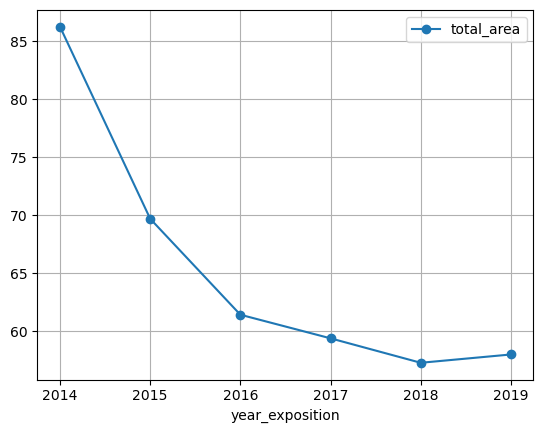

In [56]:
data.pivot_table(index='year_exposition', values='total_area').plot(grid=True, style='o-')

Да, средняя площадь с 2014года также резко уменьшается, как и средняя цена.

 **Вывод:** Наиболее сильная корреляция наблюдается между общей площадью квартиры и ее стоимостью (коэфф. корреляции 0,71).
Стоимость квартиры также напрямую зависит от числа комнат: чем их больше, тем квартира дороже.  
Квартиры на первом или последнем этаже обычно продаются по более низкой цене, чем квартиры на других этажах.
День недели и месяц публикации объявления не влияют на стоимость, по которой объект недвижимости будет продан. При этом, исследованние показало, что в 2014, 2015 годах продавались квартиры болшей площади по сравнению с последующими годами, и соответственно более дорогие.

### Средняя стоимость квадратного метра в топ-10 городов по числу объявлений

In [57]:
data.groupby('locality_name').agg({'rooms':'count', 'sqm_price':'median'}) \
    .sort_values(by = 'rooms', ascending = False) \
    .head(10)

,rooms,sqm_price
locality_name,,
Санкт-Петербург,15563,104750.00
Мурино,550,86058.50
Шушары,439,76829.00
Всеволожск,397,65789.00
Пушкин,367,100000.00
Колпино,337,74722.00
Парголово,327,91642.00
Гатчина,306,67860.00
Кудрово,299,91860.00


**Вывод:** Наибольшая средняя стоимость квадратного метра, как и ожидалось, в Санкт-Петербурге. Затем идёт Пушкин, что, вероятно, вызвано хорошей застройкой и историко-культурной ценностью этого места. Затем идут районы, фактически являющиеся Санкт-Петербургом и непосредственно к нему примыкающие. Из топ-10 наименьшая стоимость в Гатчине, Всеволожске и Выборге, расположенных на большом расстоянии от Санкт-Петербурга.

### Средняя цена за каждый км в Санкт-Петербурге

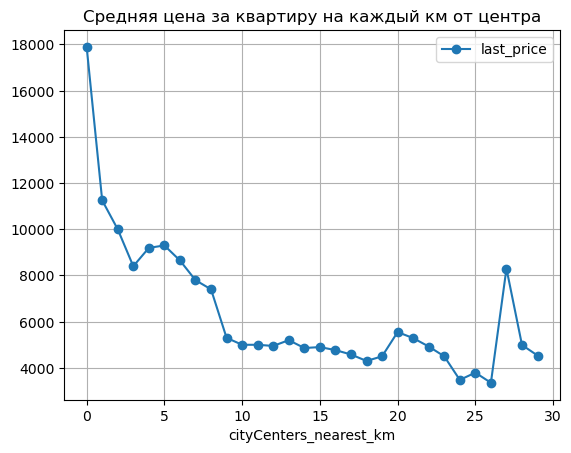

In [58]:
data_spb = data.query('locality_name == "Санкт-Петербург"').pivot_table(index='cityCenters_nearest_km', values='last_price', aggfunc='median')
data_spb.plot(grid=True, style='o-', title = 'Средняя цена за квартиру на каждый км от центра');

**Вывод:** Чем удаленнее от центра квартира, тем ниже цена. при этом до 10км удаленности цена с очень высокой падает резко до средней - 4-6млн. Более высокая кареляция характерна географически для той части города, где располагаются в том числе "спальные" районы (Мурино, Кудрово).

### Общий вывод

В ходе работы мною проведена обработка данных для качественного анализа: удалены аномальные значения, изменены некорректные типы данных, удалены дубликаты. Проведено исследование факторов, потенциально значимых для оценки рыночной стоимоти квартир.  
Итак, параметры, влияющие на рыночную стоимость объектов недвижимости:
- расстояние от центра города: с удаленностью от центра квартиры в среднем дешевеют
- общая площадь квартиры: чем больше площадь, тем дороже квартира
- число комнат: цена тем выше, чем больше комнат
- этажность: квартиры на 1м и последнем этажах дешевле всех остальных

Разработчикам следует добавить условие на ручной ввод: высота потолков не может быть двузначной величиной, а также меньше 2 м.
Типы собираемых данных не всегда корректны: цена, количество этажей в доме, количество балконов, срок размещения должны вводиться как целые числа.
Предлагаю по возможности автоматизировать заполнение этажности дома на основе точного адреса
Предлагаю сделать обязательным заполнение населенного пункта, а также ограничить ввод выбором из выпадающего списка для предупреждения неявных дубликатов.

